In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"duvan0598","key":"dd66d6752e8b1194f147e8c526826508"}'}

In [2]:
!pip install kaggle
# Crear carpeta para Kaggle
!mkdir -p ~/.kaggle
# Mover kaggle.json a la carpeta correcta
!mv kaggle.json ~/.kaggle/
# Cambiar permisos
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Descargar los datos de la competencia Plant Pathology 2020
!kaggle competitions download -c plant-pathology-2020-fgvc7

 97% 753M/779M [00:03<00:00, 146MB/s]
100% 779M/779M [00:03<00:00, 213MB/s]


In [4]:
import zipfile
# Descomprimimos todo el dataset
with zipfile.ZipFile("plant-pathology-2020-fgvc7.zip", 'r') as zip_ref:
    zip_ref.extractall("plant_data")

#***▶ Exploración Inicial del Dataset***  :

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [6]:
#Cargar archivos CSV (train y test)
train_df = pd.read_csv("plant_data/train.csv")
test_df = pd.read_csv("plant_data/test.csv")

train_df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [7]:
#Información general del Dataset
print("Tamaño del train:", train_df.shape)
print("Tamaño del test:", test_df.shape)

train_df.info()
train_df.describe()

Tamaño del train: (1821, 5)
Tamaño del test: (1821, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   image_id           1821 non-null   object
 1   healthy            1821 non-null   int64 
 2   multiple_diseases  1821 non-null   int64 
 3   rust               1821 non-null   int64 
 4   scab               1821 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 71.3+ KB


,healthy,multiple_diseases,rust,scab
count,1821.000000,1821.000000,1821.000000,1821.000000
mean,0.283361,0.049973,0.341571,0.325096
std,0.450754,0.217948,0.474367,0.468539
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


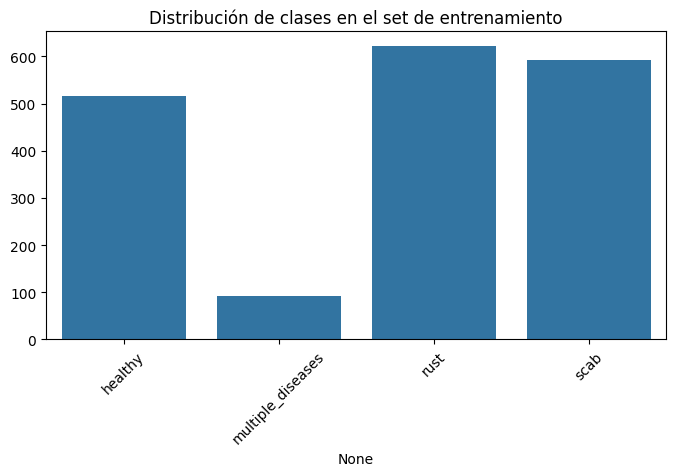

In [8]:
#Distribucion de clases
class_counts = train_df.iloc[:, 1:].sum()

plt.figure(figsize=(8,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Distribución de clases en el set de entrenamiento")
plt.xticks(rotation=45)
plt.show()

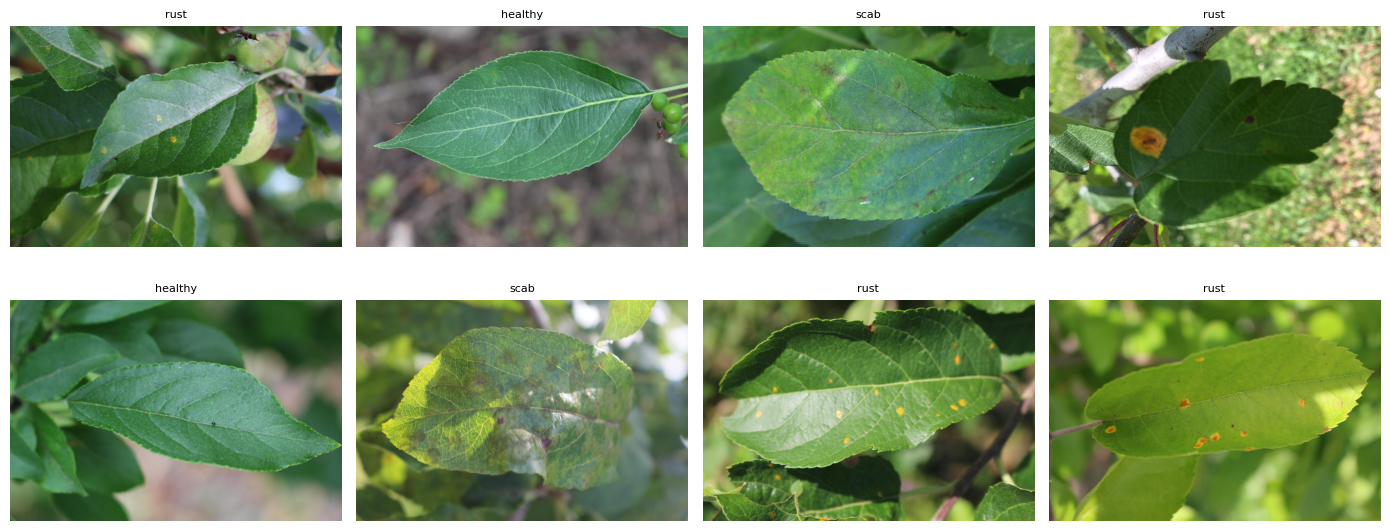

In [9]:
#Mostrar imagenes de ejemplo
image_dir = "plant_data/images"

def show_sample_images(df, num=8):
    plt.figure(figsize=(14,6))
    sample = df.sample(num)
    for i, (_, row) in enumerate(sample.iterrows()):
        img_path = os.path.join(image_dir, row['image_id'] + ".jpg")
        img = Image.open(img_path)
        plt.subplot(2, num//2, i+1)
        plt.imshow(img)
        plt.axis("off")
        title = ", ".join([col for col in df.columns[1:] if row[col] == 1])
        plt.title(title, fontsize=8)
    plt.tight_layout()
    plt.show()

show_sample_images(train_df, num=8)

In [10]:
#Tamaño y resolucion de algunas imagenes
import numpy as np

def get_image_info(df, n=20):
    sizes = []
    for _, row in df.sample(n).iterrows():
        img_path = os.path.join(image_dir, row['image_id'] + ".jpg")
        img = Image.open(img_path)
        sizes.append(img.size)
    return sizes

sizes = get_image_info(train_df, 20)
sizes

[(2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365),
 (2048, 1365)]

In [11]:
#Verificación de imágenes corruptas o faltantes
missing = []

for _, row in train_df.iterrows():
    path = os.path.join(image_dir, row['image_id'] + ".jpg")
    if not os.path.exists(path):
        missing.append(path)

missing[:5], len(missing)

([], 0)